In [1]:
import numpy as np
from scipy.stats import *

In [3]:
data = np.array([
    22, 29, 16, 15, 18, 17, 12, 13, 17, 16, 15,
    19, 17, 10, 21, 15, 14, 17, 18, 12, 20, 14,
    16, 15, 16, 20, 22, 14, 25, 19, 23, 15, 19,
    18, 23, 22, 16, 16, 19, 13, 18, 24, 24, 26,
    13, 18, 17, 15, 24, 15, 17, 14, 18, 17, 21,
    16, 21, 25, 19, 20, 27, 16, 17, 16, 21
])

n = len(data)

mean = np.mean(data)
std = np.std(data, ddof=1)

print('Sample size:', n)
print('Sample mean:', mean)
print('Standard deviation', round(std, 4))

Sample size: 65
Sample mean: 18.107692307692307
Standard deviation 3.9612


In [30]:
interval_edges = [
    -np.inf, mean - 2*std, mean - std, mean, mean + std, mean + 2*std, np.inf
]

observed_frequency = []
expected_frequency = []

for i in range(6):
    obs = np.sum((data >= interval_edges[i]) & (data < interval_edges[i+1]))
    observed_frequency.append(obs)

    p = norm.cdf(interval_edges[i+1], mean, std) - norm.cdf(interval_edges[i], mean, std)
    exp = n * p
    expected_frequency.append(exp)
    print(f'Interval {i+1}: Observed = {obs}, Expected = {round(exp,2)}')

observed_frequency = np.array(observed_frequency)
expected_frequency = np.array(expected_frequency)


Interval 1: Observed = 1, Expected = 1.48
Interval 2: Observed = 9, Expected = 8.83
Interval 3: Observed = 30, Expected = 22.19
Interval 4: Observed = 15, Expected = 22.19
Interval 5: Observed = 8, Expected = 8.83
Interval 6: Observed = 2, Expected = 1.48


In [31]:
chi2_stat, p_value = chisquare(f_obs=observed_frequency, f_exp=expected_frequency)

print("Chi2 statistic:", chi2_stat)
print("p-value:", p_value)

Chi2 statistic: 5.499814994090474
p-value: 0.35796616784732305


Ho: The population has a normal distribution

Ha: The population does not have a normal distribution

Significance level:  alpha = 0.05

In [39]:
alpha = 0.05

if alpha > p_value:
    print('Strong evidence to reject H0 with alpha = {}'.format(alpha))
else:
    print('Weak evidence to reject H0 with alpha = {}'.format(alpha))

Weak evidence to reject H0 with alpha = 0.05


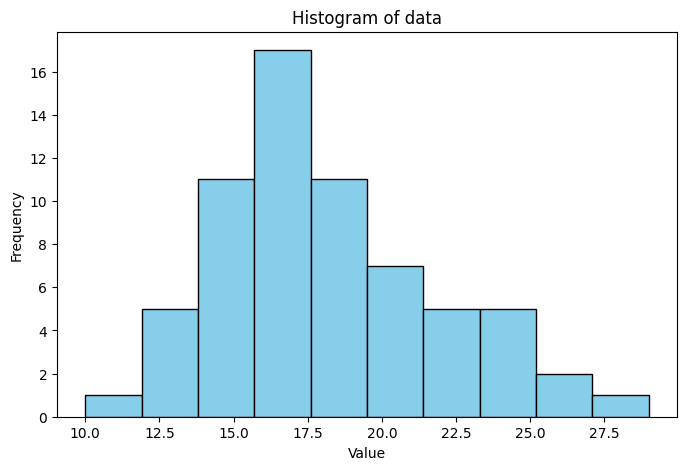

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(data, bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()